## Download and prepare the dataset

Set up the posits as default

In [188]:
import tensorflow.python.keras as k
# k.backend.set_floatx("posit160")
k.backend.floatx()

'posit160'

In [189]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow import random

random.set_seed(1024)

def random_normal_init(shape, dtype=None):
    return random.normal(shape, dtype="posit160")

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images[:20000].reshape((20000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels[:20000])
test_labels = to_categorical(test_labels)

print("The type of the training and test set samples is a {0} of {1}".format(type(train_images), type(train_images[0][0][0][0])))

The type of the training and test set samples is a <class 'numpy.ndarray'> of <class 'numpy.float32'>


In [190]:
train_images.shape

(20000, 28, 28, 1)

## Download and prepare the dataset

In [191]:
from tensorflow.python.keras import layers
from tensorflow.python.keras import models

#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(10, activation='softmax'))

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1), kernel_initializer=random_normal_init))
# model.add(layers.MaxPooling2D((2, 2),input_shape=(28, 28, 1)))
# model.add(layers.Flatten(input_shape=(28, 28, 1)))
# model.add(layers.Dense(128, activation="tanh", kernel_initializer=random_normal_init))
# model.add(layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init))

# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2),input_shape=(28, 28, 1)))
# model.add(layers.Flatten(input_shape=(28, 28, 1)))
# model.add(layers.Dense(128, activation="tanh"))
# model.add(layers.Dense(10, activation='softmax'))

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1), kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=random_normal_init))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax',kernel_initializer=random_normal_init))


Let's display the architecture of our convnet so far:

In [192]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 32)              

We are going to do 10-way classification, so we use a final layer with 10 outputs and a softmax activation. Now here's what our network 
looks like:

In [193]:
optimizer = k.optimizers.adam_v2.Adam(learning_rate=1e-3)

model.compile(optimizer=optimizer,
              loss=k.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [194]:
model.get_weights()

[array([[[[0.614258, 1.66406, 1.53076, -0.784668, 0.142151, 1.05859,
           1.01807, 1.09521, 1.8877, -0.141479, 0.861572, -0.953369,
           0.0431213, -2.97363, -1.39062, -0.467529, 1.1748, -0.572998,
           2.06543, 0.693115, 1.04834, -1.24219, -0.0320129, 0.852783,
           -1.98779, 0.441772, 0.564209, 0.723389, -0.0661316, -0.62085,
           -1.09912, -0.539551]],
 
         [[-1.3501, -0.0612488, -0.79126, 0.63623, 0.605713, -0.174133,
           -1.44189, 1.24414, -1.97217, 1.38916, 1.30029, -1.5835,
           0.845459, 1.22754, -0.482666, 0.744629, 0.93042, -0.344849,
           -0.482178, -1.53613, 0.391479, 1.771, 1.38428, -0.319336,
           -0.616943, 0.482422, -1.55957, -0.603271, 0.24585, 0.119385,
           -0.829102, 0.651611]],
 
         [[1.0957, -0.20752, 0.0724182, -1.59766, -0.711182, -0.817871,
           1.45508, -0.504639, -0.759033, 0.434937, 1.49658, -0.211792,
           0.0694885, 1.06934, -1.74365, 0.0834351, -1.87842, -0.916992,
      

In [195]:
earlystop_callback = k.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)

history = model.fit(train_images, train_labels, epochs=50, batch_size=125, validation_split=0.1, callbacks=[earlystop_callback])

Epoch 1/50
144/144 [==============================] - 282s 2s/step - loss: 359.0000 - accuracy: 0.2497 - val_loss: 149.0000 - val_accuracy: 0.3960
Epoch 2/50
144/144 [==============================] - 276s 2s/step - loss: 68.3750 - accuracy: 0.5332 - val_loss: 68.8750 - val_accuracy: 0.5862
Epoch 3/50
144/144 [==============================] - 267s 2s/step - loss: 54.2188 - accuracy: 0.6533 - val_loss: 41.8750 - val_accuracy: 0.6816
Epoch 4/50
144/144 [==============================] - 268s 2s/step - loss: 35.5312 - accuracy: 0.7202 - val_loss: 28.9688 - val_accuracy: 0.7317
Epoch 5/50
144/144 [==============================] - 270s 2s/step - loss: 25.2500 - accuracy: 0.7681 - val_loss: 20.5469 - val_accuracy: 0.7620
Epoch 6/50
144/144 [==============================] - 267s 2s/step - loss: 18.4375 - accuracy: 0.8225 - val_loss: 16.0625 - val_accuracy: 0.7881
Epoch 7/50
144/144 [==============================] - 265s 2s/step - loss: 14.3594 - accuracy: 0.8726 - val_loss: 12.3672 - val_

In [196]:
model.get_weights()

[array([[[[0.189697, 0.431519, 0.435913, -0.337158, 0.0013237, 0.246948,
           0.306519, 0.237122, 0.495728, -0.032135, 0.272461, -0.296997,
           0.0124741, -0.786865, -0.250122, -0.116089, 0.303223,
           -0.185486, 0.521729, 0.220886, 0.266235, -0.346191,
           0.0354919, 0.221863, -0.463745, 0.168701, 0.101074, 0.210388,
           -0.00600815, -0.141357, -1.09912, -0.0992432]],
 
         [[-0.424194, -0.0407104, -0.179382, 0.147156, 0.120453,
           -0.125488, -0.330322, 0.272827, -0.526367, 0.396729,
           0.313599, -0.486084, 0.338745, 0.302246, -0.069397, 0.221558,
           0.22644, -0.228699, -0.158875, -0.484985, 0.103729, 0.451538,
           0.462646, -0.153259, -0.184143, 0.259644, -0.384644,
           -0.228577, 0.0223389, 0.0311127, -0.829102, 0.128845]],
 
         [[0.35083, -0.127258, 0.0555725, -0.497314, -0.255249,
           -0.297852, 0.440796, -0.224487, -0.202332, 0.118713,
           0.363281, -0.154785, 0.200317, 0.258179, -0.4

**Results of the training phase**

In the following cell we've obtained the plots of the accuracy and loss for both
the training and validation set.

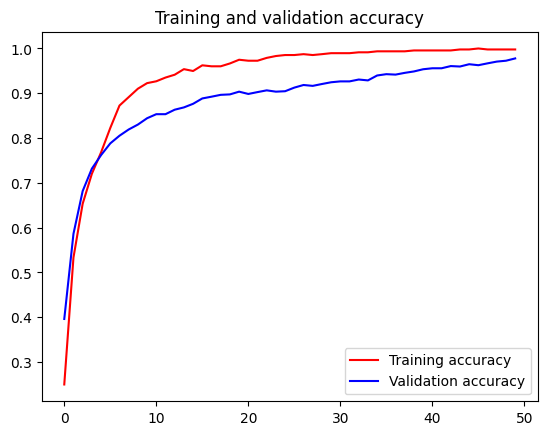

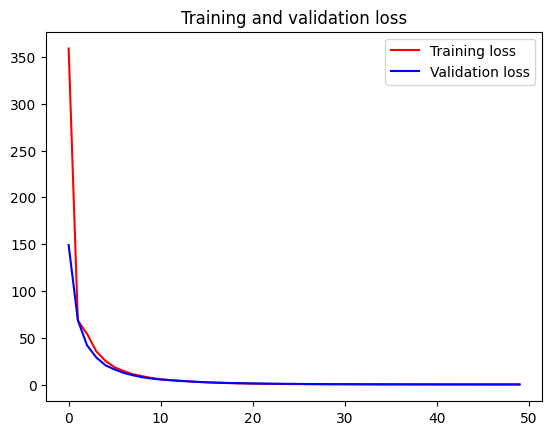

In [197]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

##  Evaluating the model on the test set

In [198]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 77s 246ms/step - loss: 0.1071 - accuracy: 0.8269


In [199]:
test_acc

0.826904

In [200]:
prediction = model.predict(train_images[:1])
print("prediction shape:", prediction.shape)
prediction

prediction shape: (1, 10)


array([[1.15037e-05, 0.000134468, 0.000894547, 0.0530396, 2.64496e-07,
        0.944092, 4.00543e-05, 0.000151634, 0.00214005, 5.30481e-05]],
      dtype=posit160)

In [201]:
print(random_normal_init((10,)))


tf.Tensor(
[-0.251343 1.73291 -0.348267 -0.491699 -1.03027 0.650146 -1.11084 -1.27588
 -0.841064 -2.08203], shape=(10,), dtype=posit160)


In [202]:
initializer = k.initializers.GlorotUniform()
values = initializer(shape=(10,), dtype="posit160")
print(values)

tf.Tensor(
[-0.546143 -0.544922 -0.545654 -0.539062 -0.545166 -0.541016 -0.544434
 -0.542236 -0.54248 -0.544678], shape=(10,), dtype=posit160)
